# RESTAURANT DATA ANALYSIS PROJECT

# LEVEL 1

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
dataset=pd.read_excel("C:/Users/Admin/Dataset.xls")

In [3]:
dataset.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
dataset = dataset.replace(r'[?#@!$%^*_]', '', regex=True)

In [7]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
dataset['Cuisines'].fillna("Unknown", inplace=True)

In [9]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# TASK 1: TOP CUISINES

# Top Three Common Cuisines

In [10]:
cuisines = dataset['Cuisines'].str.split(', ').explode()
cuisines_count=cuisines.value_counts()
top_cuisines=cuisines_count.head(3)

print("Top 3 most common Cuisines:")
print(top_cuisines)

Top 3 most common Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


# Percentage of Restaurants that serve each of the Top Cuisines

In [11]:
total_restaurants= len(dataset)
percentage_of_topcuisines=(top_cuisines/total_restaurants*100).round(2)

print("Percentage of restaurants that serve each of the top cuisines:")
print(percentage_of_topcuisines)

Percentage of restaurants that serve each of the top cuisines:
Cuisines
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


# TASK 2:  CITY ANALYSIS

# The City with the Highest Number of Restaurants

In [12]:
city_count = dataset['City'].value_counts()
print(city_count)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [13]:
city_count = dataset['City'].value_counts()
top_city= city_count.idxmax()
top_rest_count = city_count.max()

print(f"The City with the highest number of Restaurants is: {top_city} ({top_rest_count} restaurants)")

The City with the highest number of Restaurants is: New Delhi (5473 restaurants)


# Average Rating for Restaurants in each City

In [14]:
Avg_rating = dataset.groupby('City')['Aggregate rating'].mean().round(2)

print("Average Ratings for Restaurants in each City:")
print(Avg_rating)

Average Ratings for Restaurants in each City:
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.56
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
stanbul            4.29
Name: Aggregate rating, Length: 141, dtype: float64


# The City with the Highest Average Rating

In [15]:
top_rated_city = Avg_rating.idxmax()
top_rating = Avg_rating.max()
print(f"City with the Highest Average Rating: {top_rated_city} (Avg Rating: {top_rating})")

City with the Highest Average Rating: Inner City (Avg Rating: 4.9)


# TASK 3: PRICE RANGE DISTRIBUTION

# Bar Chart to Visualize the Distribution of Price Ranges

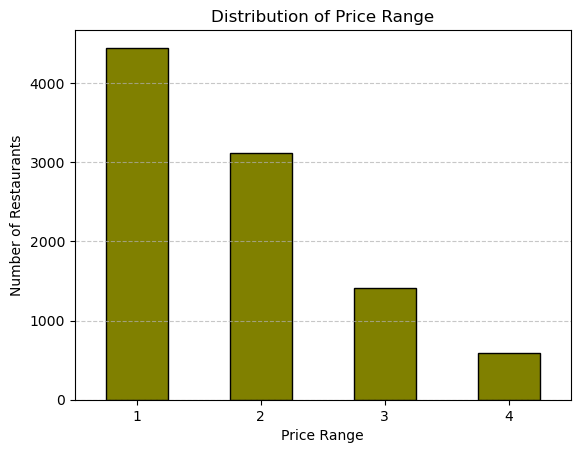

In [16]:
price_counts = dataset['Price range'].value_counts().sort_index()
price_counts.plot(kind='bar', color='olive',edgecolor='black')
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Percentage of Restaurants in each Price Range Category

In [17]:
percentage = (dataset['Price range'].value_counts(normalize=True) * 100).round(2)
print("Percentage of Restaurants in Each Price Range:")
print(percentage)

Percentage of Restaurants in Each Price Range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: proportion, dtype: float64


# TASK 4: ONLINE DELIVERY

# Percentage of Restaurants that Offer Online Delivery

In [18]:
online_yes = dataset[dataset['Has Online delivery'] == 'Yes']
online_del_percentage = (len(online_yes) / len(dataset))*100
print("Percentage of Restaurants that offer Online Delivery:", round(online_del_percentage, 2), "%")

Percentage of Restaurants that offer Online Delivery: 25.66 %


# Average Rating: With vs Without Online Delivery

In [19]:
with_online_delivery = dataset[dataset['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
without_online_delivery = dataset[dataset['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("Average Rating of restaurants with Online Delivery:", round(with_online_delivery, 2))
print("Average Rating of restaurants without Online Delivery:", round(without_online_delivery, 2))

Average Rating of restaurants with Online Delivery: 3.25
Average Rating of restaurants without Online Delivery: 2.47


# LEVEL 2

# TASK 1: RESTAURANT RATINGS

# The Most Common Rating Range

In [20]:
rating_counts = dataset['Aggregate rating'].value_counts().sort_index()

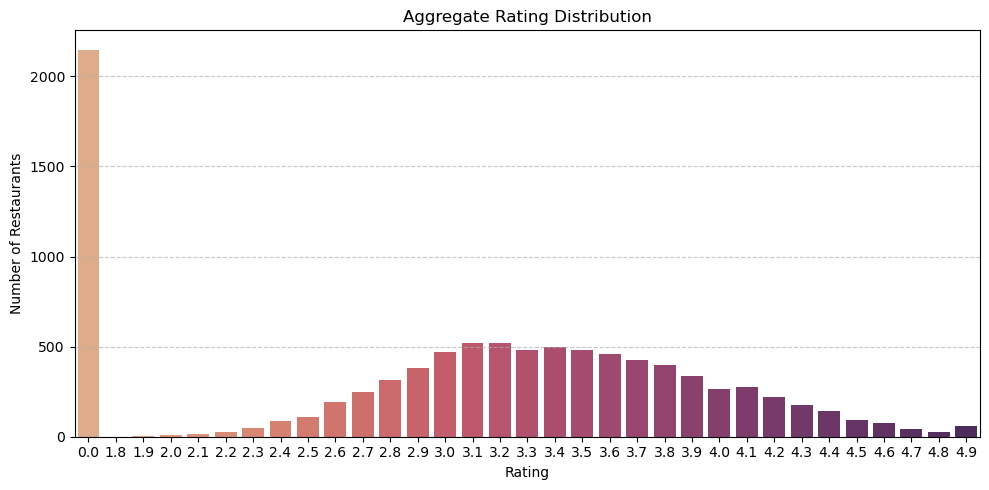

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.index,y=rating_counts.values,palette='flare')
plt.title("Aggregate Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
most_common_rating = dataset['Aggregate rating'].mode()
print(f"\nMost Common Rating: {most_common_rating}")


Most Common Rating: 0    0.0
Name: Aggregate rating, dtype: float64


# Average Number of Votes Received by Restaurants

In [23]:
average_votes = dataset['Votes'].mean()
print("Average number of votes:", round(average_votes, 2))

Average number of votes: 156.91


# Task 2: CUISINE COMBINATION

#  The Most Common Combinations of Cuisines

In [24]:
cuisine_combos = dataset['Cuisines'].dropna()
top_cuisine_combos = cuisine_combos[cuisine_combos.str.contains(',')]
top_combos = top_cuisine_combos.value_counts().head(10)
print("Top 10 Most Common Cuisine Combinations:")
print(top_combos)

Top 10 Most Common Cuisine Combinations:
Cuisines
North Indian, Chinese             511
North Indian, Mughlai             334
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
Bakery, Fast Food                 108
Chinese, North Indian             105
Ice Cream, Desserts                83
Name: count, dtype: int64


In [25]:
cuisine_combo = dataset['Cuisines'].dropna()
top_combos = cuisine_combo.value_counts().head(10)
print("Top 10 Most Common Cuisine Combinations:")
print(top_combos)

Top 10 Most Common Cuisine Combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


# Highly Rated Cuisine Combinations

In [26]:
top_combo_names = top_combos.index
top_combo_df = dataset[dataset['Cuisines'].isin(top_combo_names)]
combo_avg_ratings = top_combo_df.groupby('Cuisines')['Aggregate rating'].mean().round(2)
print("\nAverage Ratings for the Top Most Common Cuisine Combinations:")
print(combo_avg_ratings.sort_values(ascending=False))


Average Ratings for the Top Most Common Cuisine Combinations:
Cuisines
Cafe                              2.89
North Indian, Mughlai             2.89
North Indian, Mughlai, Chinese    2.57
North Indian, Chinese             2.42
Bakery, Desserts                  2.32
Street Food                       2.16
Fast Food                         2.12
Chinese                           2.04
Bakery                            1.92
North Indian                      1.67
Name: Aggregate rating, dtype: float64


# Task 3: GEOGRAPHIC ANALYSIS

In [27]:
!pip install folium

# Mapping Restaurant Locations Using Latitude and Longitude Coordinates

In [28]:
import folium

map_center = [dataset['Latitude'].mean(), dataset['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

for index, row in dataset.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(restaurant_map)

top_cities = dataset['City'].value_counts().head(5)
top_city_names = top_cities.index

for city in top_city_names:
    city_data = dataset[dataset['City'] == city]
    city_lat = city_data['Latitude'].mean()
    city_lon = city_data['Longitude'].mean()
    city_count = top_cities[city]
    
    folium.Marker(
        location=[city_lat, city_lon],
        popup=f"{city}: {city_count} restaurants",
        icon=folium.Icon(color='purple', icon='info-sign')
    ).add_to(restaurant_map)

restaurant_map


# Clusters of Restaurants

In [29]:
city_clusters = dataset['City'].value_counts().head(10)

print("Top 10 Cities with the Most Restaurants (Clusters):")
print(city_clusters)

Top 10 Cities with the Most Restaurants (Clusters):
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


# Task 4: RESTAURANT CHAINS

# Identify Restaurant Chains

In [30]:
chain_counts = dataset['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
print("Number of Restaurant Chains:", len(restaurant_chains))
print("Examples of Restaurant Chains:")
print(restaurant_chains.head(10))

Number of Restaurant Chains: 733
Examples of Restaurant Chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


# Analyze Ratings and Popularity of Restaurant Chains

In [31]:
chain_df = dataset[dataset['Restaurant Name'].isin(restaurant_chains.index)]
chain_analysis = chain_df.groupby('Restaurant Name')[['Aggregate rating', 'Votes']].agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).round(2).sort_values(by='Votes', ascending=False)

print("Top Restaurant Chains by Popularity (Votes):")
print(chain_analysis.head(10))

Top Restaurant Chains by Popularity (Votes):
                           Aggregate rating  Votes
Restaurant Name                                   
Barbeque Nation                        4.35  28142
AB's - Absolute Barbecues              4.82  13400
Big Chill                              4.47  10853
Farzi Cafe                             4.37  10098
Truffles                               3.95   9682
Chili's                                4.58   8156
Joey's Pizza                           4.25   7807
Big Yellow Door                        4.27   7511
Saravana Bhavan                        4.13   7238
Starbucks                              3.81   7139


# LEVEL 3

# Task 1: RESTAURANT REVIEWS

# Common Positive and Negative Keywords from Reviews

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
reviews = dataset['Rating text'].dropna()
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(reviews)
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_counts.sum().sort_values(ascending=False).head()
print("Top Common Keywords in Reviews:")
print(top_words)

Top Common Keywords in Reviews:
average      3737
good         3179
rated        2148
excellent     301
poor          186
dtype: int64


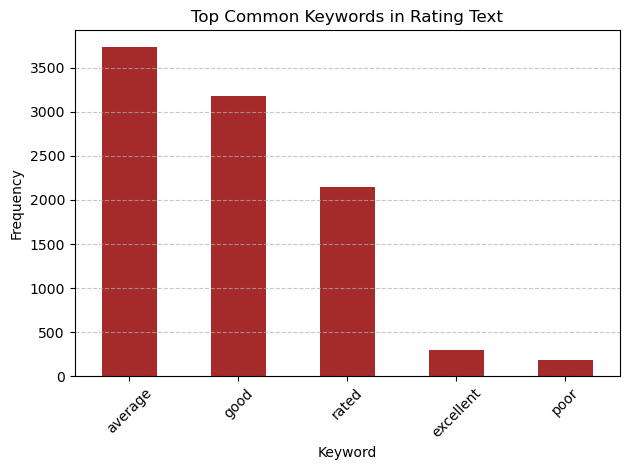

In [33]:
top_words.plot(kind='bar', color='brown')
plt.title("Top Common Keywords in Rating Text")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#  Average Length of Reviews

In [34]:
dataset['Review Length'] = dataset['Rating text'].astype(str).apply(len)

avg_length = dataset['Review Length'].mean()
print("Average Review Length:", round(avg_length, 2), "characters")

Average Review Length: 7.02 characters


# Relationship between Review Length and Rating

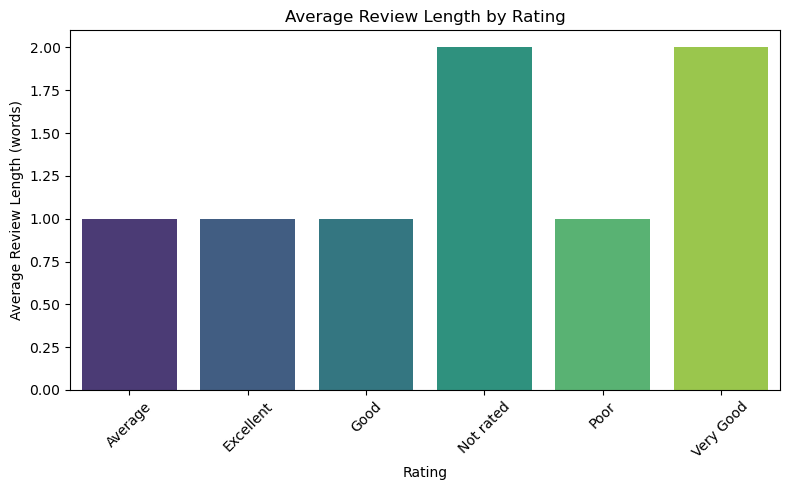

In [35]:
dataset['Review Length'] = dataset['Rating text'].apply(lambda x: len(str(x).split()))
rating_group = dataset.groupby('Rating text')['Review Length'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_group.index, y=rating_group.values, palette='viridis')
plt.title('Average Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

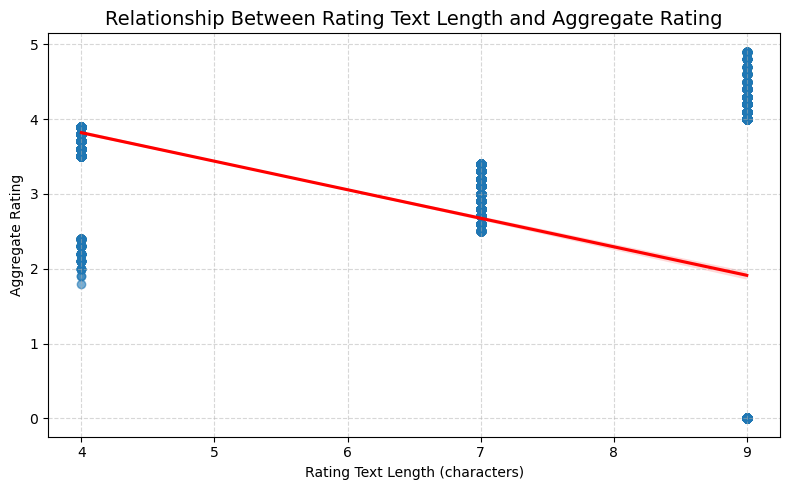

In [36]:
dataset['Text Length'] = dataset['Rating text'].astype(str).apply(len)

plt.figure(figsize=(8, 5))
sns.regplot(x='Text Length', y='Aggregate rating', data=dataset, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title("Relationship Between Rating Text Length and Aggregate Rating", fontsize=14)
plt.xlabel("Rating Text Length (characters)")
plt.ylabel("Aggregate Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Task 2: VOTES ANALYSIS

# The Restaurants With The Highest And Lowest Number Of Votes

In [57]:
# Top 3 restaurants with highest votes
top_voted = dataset.sort_values(by='Votes', ascending=False).head(3).reset_index(drop=True)

# Bottom 3 restaurants with non-zero votes
least_voted = dataset[dataset['Votes'] > 0].sort_values(by='Votes').head(3).reset_index(drop=True)

print("🏆 Top 3 Restaurants with Highest Votes:")
print(top_voted[['Restaurant Name', 'Votes']])

print("\n🔻 Bottom 3 Restaurants with Lowest Non-Zero Votes:")
print(least_voted[['Restaurant Name', 'Votes']])

🏆 Top 3 Restaurants with Highest Votes:
    Restaurant Name  Votes
0              Toit  10934
1          Truffles   9667
2  Hauz Khas Social   7931

🔻 Bottom 3 Restaurants with Lowest Non-Zero Votes:
      Restaurant Name  Votes
0               Ahata      1
1     The Cake Basket      1
2  Namaste Restaurant      1


# Correlation Between The Number Of Votes And The Rating Of A Restaurant

In [44]:
# Calculate correlation between Votes and Aggregate rating
correlation = dataset[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
print("Correlation between Votes and Rating:", round(correlation, 2))

Correlation between Votes and Rating: 0.31


C:\Users\Admin\AppData\Local\Temp\ipykernel_9560\3572767137.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


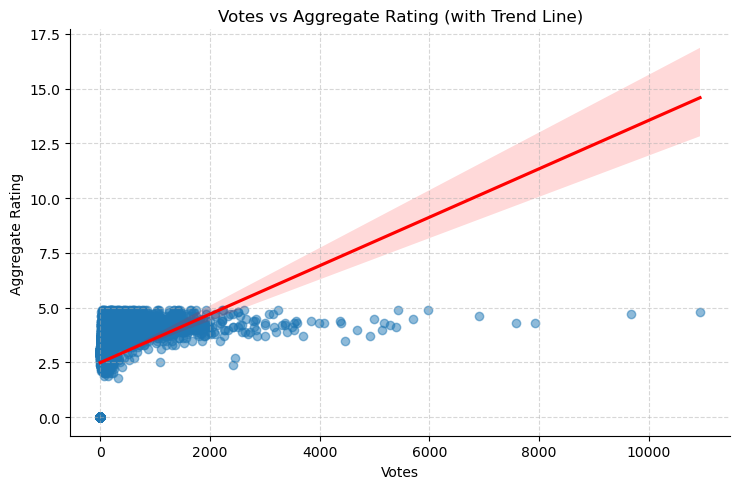

In [60]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
sns.lmplot(x='Votes', y='Aggregate rating', data=dataset, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Votes vs Aggregate Rating (with Trend Line)")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [47]:
# Simple correlation between votes and ratings
votes_rating_corr = dataset['Votes'].corr(dataset['Aggregate rating'])
print(f"Correlation between number of votes and aggregate rating: {round(votes_rating_corr, 2)}")

Correlation between number of votes and aggregate rating: 0.31


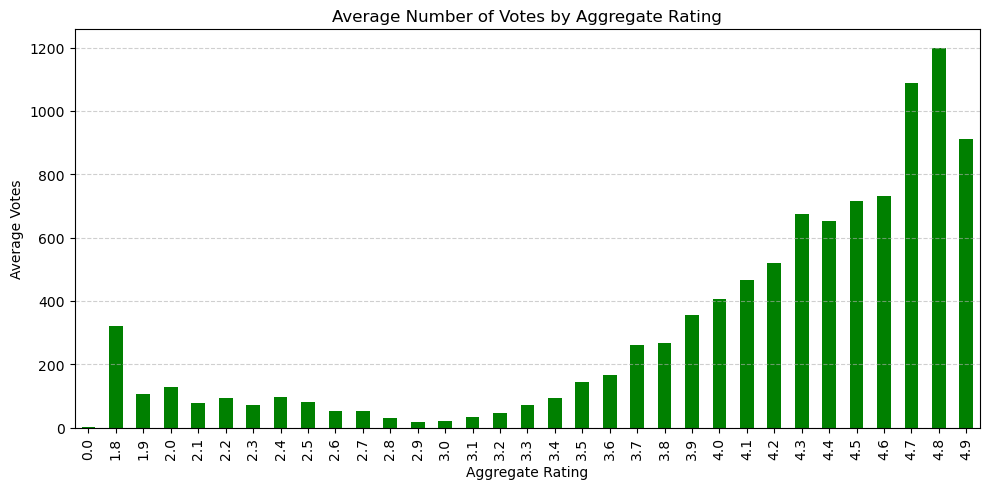

In [62]:
import matplotlib.pyplot as plt

# Group by Aggregate rating and calculate average number of votes
avg_votes_by_rating = dataset.groupby('Aggregate rating')['Votes'].mean().round(2)

# Plot as bar chart
plt.figure(figsize=(10, 5))
avg_votes_by_rating.plot(kind='bar', color='green')

plt.title("Average Number of Votes by Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Average Votes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()